In [21]:
# Autoreload possibly interferes with IntelliJ debugging
# %reload_ext autoreload
# %autoreload 2
import logging
from datetime import datetime
# class FlushHandler(logging.StreamHandler):
#     def emit(self, record):e
#         super().emit(record)
#         self.flush()
import io
import sys
import contextlib
import traceback
from tqdm.auto import tqdm

from importlib import reload

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
# log = lambda msg: logging.info(msg)
log = lambda msg: print(f"{datetime.today()} {msg}")

#assert False
global_force = False

import pandas as pd
import os

input_dir = "C:\\dev\\play\\brainwave-data"
stats_df = pd.read_csv(input_dir + os.path.sep + "stats.csv")

# Find Brainflow files that haven't been copied over

In [22]:
    import pytz
    from tqdm import tqdm
    import paramiko
    import re
    from datetime import datetime, timedelta
    import os
    import dotenv
    dotenv.load_dotenv()

    # Define the time window
    time_window = timedelta(minutes=10)

    # Define the remote server details
    hostname = os.getenv('SSH_HOST')
    username = os.getenv('SSH_USERNAME')
    password = os.getenv('SSH_PASSWORD')
    remote_dir = '/home/graham/dev/Brainwave-Data'
    local_dir = input_dir

    # Create an SSH client
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    ssh.connect(hostname, username=username, password=password, compress=True)

    # List files in the remote directory
stdin, stdout, stderr = ssh.exec_command(f'find {remote_dir} -name "*.brainflow.csv" -size +200M -printf "%f\\n"')
remote_brainflow_files = stdout.read().decode().splitlines()


2025-03-24 08:50:19,674 - INFO - Connected (version 2.0, client OpenSSH_9.6)
2025-03-24 08:50:19,857 - INFO - Authentication (password) successful!


In [23]:
remote_brainflow_files

['2024-09-30-21-27-49.brainflow.csv',
 '2024-10-01-21-36-11.brainflow.csv',
 '2024-10-02-21-21-15.brainflow.csv',
 '2024-10-04-21-13-39.brainflow.csv',
 '2024-10-05-21-09-47.brainflow.csv',
 '2024-10-06-21-29-18.brainflow.csv',
 '2024-10-07-21-35-18.brainflow.csv',
 '2024-10-08-21-21-34.brainflow.csv',
 '2024-10-09-21-22-04.brainflow.csv',
 '2024-10-11-21-16-27.brainflow.csv',
 '2024-10-15-22-01-52.brainflow.csv',
 '2024-10-21-21-30-19.brainflow.csv',
 '2024-10-23-21-24-03.brainflow.csv',
 '2024-10-24-21-35-33.brainflow.csv',
 '2024-10-29-20-42-12.brainflow.csv',
 '2024-10-30-21-26-55.brainflow.csv',
 '2024-11-01-21-32-22.brainflow.csv',
 '2024-11-02-21-29-03.brainflow.csv',
 '2024-11-04-21-20-51.brainflow.csv',
 '2024-11-05-21-34-15.brainflow.csv',
 '2024-11-07-21-26-18.brainflow.csv',
 '2024-11-08-21-16-53.brainflow.csv',
 '2024-11-09-21-27-51.brainflow.csv',
 '2024-11-12-21-11-43.brainflow.csv',
 '2024-11-16-21-54-46.brainflow.csv',
 '2024-11-19-21-29-04.brainflow.csv',
 '2024-11-20

In [24]:
files_to_copy = remote_brainflow_files.copy()


for root, dirs, files in os.walk(input_dir):
    #for idx, file_name in enumerate(tqdm(dirs, desc="Converting Brainflow to FIF")):
    for idx, file_name in enumerate(files):
        full_input_filename = os.path.join(root, file_name)
        if ".brainflow.csv.bz2" in full_input_filename:
            #print(f"Processing {full_input_filename}")
            file_name_without_bz2 = file_name.removesuffix(".bz2")
            already_have = file_name_without_bz2 in remote_brainflow_files
            print(f"Already have {full_input_filename}: {already_have}")
            if already_have:
                files_to_copy.remove(file_name_without_bz2)



Already have C:\dev\play\brainwave-data\08-07-2024--22-51-16\08-07-2024--22-51-16.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\09-07-2024--22-52-25\09-07-2024--22-52-25.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-07-15-09-10-07\2024-07-15-09-10-07.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-07-16-23-14-52\2024-07-16-23-14-52.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-07-24-18-57-03\2024-07-24-18-57-03.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-03-21-10-58\2024-09-03-21-10-58.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-04-21-44-08\2024-09-04-21-44-08.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-08-21-01-39\2024-09-08-21-01-39.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-10-21-22-21\2024-09-10-21-22-21.brainflow.csv.bz2: False
Already have C:\dev\play\brainwave-data\2024-09-11-

In [25]:
files_to_copy

['2025-03-23-21-09-37.brainflow.csv']

In [26]:
import os
import bz2
from tqdm import tqdm

sftp = ssh.open_sftp()
for file in files_to_copy:
    remote_file_path = remote_dir + "/" + file
    local_file_path = os.path.join(input_dir, file)
    log(f"Copying Brainflow backup remote:{remote_file_path} to {local_file_path}")

    # Get the file size
    remote_file_size = sftp.stat(remote_file_path).st_size

    with tqdm(total=remote_file_size, unit='B', unit_scale=True, desc=file, ascii=True) as pbar:
        local_file_path = os.path.join(input_dir, file)
    
        def callback(transferred_so_far, total_to_transfer):
            pbar.update(transferred_so_far - pbar.n)
    
        # Create a file-like object that writes to the local file
        with open(local_file_path, 'wb') as local_file:
            sftp.getfo(remote_file_path, local_file, callback=callback)
sftp.close()
ssh.close()


2025-03-24 08:50:21,686 - INFO - [chan 1] Opened sftp connection (server version 3)


2025-03-24 08:50:21.689263 Copying Brainflow backup remote:/home/graham/dev/Brainwave-Data/2025-03-23-21-09-37.brainflow.csv to C:\dev\play\brainwave-data\2025-03-23-21-09-37.brainflow.csv


2025-03-23-21-09-37.brainflow.csv: 100%|##########| 2.15G/2.15G [01:11<00:00, 29.9MB/s]   
2025-03-24 08:51:33,556 - INFO - [chan 1] sftp session closed.


## Convert Brainflow files to FIF

In [27]:
def get_brainflow_compressed_filename(full_input_filename: str) -> str:
    full_output_dirname = webserver.output_dirname(full_input_filename)
    compressed_full_output_filename = str(os.path.join(full_output_dirname, os.path.basename(full_input_filename))) + '.bz2'
    return compressed_full_output_filename

In [28]:
from datetime import datetime

import webserver
import convert
# import zstandard as zstd
import os
import bz2
import time
import shutil

errors = []
processed = []

from sample_rates import real_sample_rate

# Could get these working later
skip_list = ['2024-09-10-21-22-21']

def compress_bz2(input_file, output_file):
    start_time = time.time()
    with open(input_file, 'rb') as f_in:
        with bz2.open(output_file, 'wb', compresslevel=9) as f_out:
            shutil.copyfileobj(f_in, f_out)
    end_time = time.time()
    return end_time - start_time, os.path.getsize(output_file)

for root, dirs, files in os.walk(input_dir):
    #for idx, file_name in enumerate(tqdm(dirs, desc="Converting Brainflow to FIF")):
    for idx, file_name in enumerate(files):
        full_input_filename = os.path.join(root, file_name)
        try:
            if full_input_filename.endswith(".brainflow.csv"):
                full_output_dirname = webserver.output_dirname(full_input_filename)
                full_output_filename = str(os.path.join(full_output_dirname, 'raw.fif'))
                
                compressed_full_output_filename = get_brainflow_compressed_filename(full_input_filename)
                
                if not os.path.exists(compressed_full_output_filename):
                    log(f"Compressing file {full_input_filename} to " + compressed_full_output_filename)
                    processed.append("Compressing " + full_input_filename)
                    try:
                        os.mkdir(os.path.dirname(compressed_full_output_filename))
                    except:
                        pass
                    compress_bz2(full_input_filename, compressed_full_output_filename) 
                    
                if os.path.exists(full_output_filename):
                    log(f"Skipping file {full_input_filename} as {full_output_filename} and {compressed_full_output_filename} already exist")
                    continue
                should_skip = False
                for s in skip_list:
                    if s in full_input_filename:
                        log(f"Skipping file {full_input_filename}")
                        should_skip = True
                if not should_skip:
                    log(f"Processing file {full_input_filename}")
                    processed.append("Processing " + full_input_filename)
                    channels = None
                    date_time_str = os.path.basename(full_input_filename).removesuffix(".brainflow.csv")
                    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d-%H-%M-%S')
                    log(f"Date time obj: {date_time_obj} {date_time_obj > datetime(2025, 3, 12, 0, 0, 0)} {date_time_str}")
                    if (date_time_obj > datetime(2025, 3, 12, 0, 0, 0) and date_time_obj < datetime(2025, 3, 14, 0, 0, 0)):
                        channels = ['Fpz-M1', 'O2-M1']
                    elif (date_time_obj > datetime(2024, 9, 1, 0, 0, 0)):
                        channels = ['Fpz-M1']
        
                    if channels is not None:
                        log(f"Processing file {full_input_filename} with channels {channels}")
                        # Changing to gap-filling on 30th Nov '24
                        # Fixing sample rate on 21st Mar '25
                        convert.convert_and_save_brainflow_file_with_gap_filling(log, full_input_filename, full_output_filename, channels, real_sample_rate)

        except Exception as e:
            msg = "Error processing file: " + full_input_filename
            log(msg)
            log(e)
            errors.append(msg)


2025-03-24 08:51:52.098874 Skipping file C:\dev\play\brainwave-data\2024-12-28-21-33-53.brainflow.csv as C:\dev\play\brainwave-data\2024-12-28-21-33-53\raw.fif and C:\dev\play\brainwave-data\2024-12-28-21-33-53\2024-12-28-21-33-53.brainflow.csv.bz2 already exist
2025-03-24 08:51:52.098874 Skipping file C:\dev\play\brainwave-data\2024-12-29-21-15-24.brainflow.csv as C:\dev\play\brainwave-data\2024-12-29-21-15-24\raw.fif and C:\dev\play\brainwave-data\2024-12-29-21-15-24\2024-12-29-21-15-24.brainflow.csv.bz2 already exist
2025-03-24 08:51:52.098874 Skipping file C:\dev\play\brainwave-data\2024-12-30-21-34-52.brainflow.csv as C:\dev\play\brainwave-data\2024-12-30-21-34-52\raw.fif and C:\dev\play\brainwave-data\2024-12-30-21-34-52\2024-12-30-21-34-52.brainflow.csv.bz2 already exist
2025-03-24 08:51:52.098874 Skipping file C:\dev\play\brainwave-data\2024-12-31-21-12-28.brainflow.csv as C:\dev\play\brainwave-data\2024-12-31-21-12-28\raw.fif and C:\dev\play\brainwave-data\2024-12-31-21-12-28\

c:\dev\Brainwave-Processor\convert.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idx_and_eeg_channels_and_timestamp['datetime'] = pd.to_datetime(idx_and_eeg_channels_and_timestamp['timestamp'],unit="s").dt.tz_localize('UTC')
Processing rows: 100%|██████████| 8871990/8871990 [00:06<00:00, 1275521.02it/s]


Gaps:  datetime
False    8867382
True          17
Name: count, dtype: int64


Processing rows:   3%|▎         | 265596/8867398 [00:02<01:08, 125044.00it/s]

Gap 250509 start time:  2025-03-23 21:26:17.441298962+00:00
Gap 250509 end time:  2025-03-23 21:26:18.521223067+00:00


Processing rows:  12%|█▏        | 1042573/8867398 [00:08<01:22, 94295.16it/s] 

Gap 1039479 start time:  2025-03-23 22:18:49.081903934+00:00
Gap 1039479 end time:  2025-03-23 22:19:31.057199001+00:00
Gap 1039481 start time:  2025-03-23 22:19:31.057225943+00:00
Gap 1039481 end time:  2025-03-23 22:19:32.993796110+00:00
Gap 1039495 start time:  2025-03-23 22:19:33.082086086+00:00
Gap 1039495 end time:  2025-03-23 22:19:34.058270931+00:00
Gap 1039497 start time:  2025-03-23 22:19:34.058383942+00:00
Gap 1039497 end time:  2025-03-23 22:19:34.995151043+00:00


Processing rows:  12%|█▏        | 1080637/8867398 [00:08<01:09, 112541.41it/s]

Gap 1057890 start time:  2025-03-23 22:20:48.427023888+00:00
Gap 1057890 end time:  2025-03-23 22:20:49.447010040+00:00


Processing rows:  36%|███▋      | 3235989/8867398 [00:23<00:38, 146298.21it/s]

Gap 3208775 start time:  2025-03-24 00:43:58.350646973+00:00
Gap 3208775 end time:  2025-03-24 00:43:59.372183084+00:00


Processing rows:  38%|███▊      | 3354464/8867398 [00:24<00:53, 103764.68it/s]

Gap 3351075 start time:  2025-03-24 00:53:27.650892973+00:00
Gap 3351075 end time:  2025-03-24 00:53:29.633661032+00:00
Gap 3351221 start time:  2025-03-24 00:53:30.360261917+00:00
Gap 3351221 end time:  2025-03-24 00:54:12.242810011+00:00
Gap 3351232 start time:  2025-03-24 00:54:12.357162952+00:00
Gap 3351232 end time:  2025-03-24 00:54:15.547317982+00:00
Gap 3351233 start time:  2025-03-24 00:54:15.547317982+00:00
Gap 3351233 end time:  2025-03-24 00:54:20.429111004+00:00
Gap 3351265 start time:  2025-03-24 00:54:20.747030973+00:00
Gap 3351265 end time:  2025-03-24 00:54:21.497246027+00:00


Processing rows:  48%|████▊     | 4294464/8867398 [00:30<00:29, 155967.38it/s]

Gap 4270797 start time:  2025-03-24 01:55:33.291835070+00:00
Gap 4270797 end time:  2025-03-24 01:55:34.312272072+00:00


Processing rows:  60%|██████    | 5364761/8867398 [00:39<00:26, 132208.49it/s]

Gap 5346178 start time:  2025-03-24 03:07:08.281702995+00:00
Gap 5346178 end time:  2025-03-24 03:07:09.299048901+00:00


Processing rows:  73%|███████▎  | 6434305/8867398 [00:48<00:18, 133739.57it/s]

Gap 6421636 start time:  2025-03-24 04:18:43.196244955+00:00
Gap 6421636 end time:  2025-03-24 04:18:44.216264963+00:00


Processing rows:  85%|████████▍ | 7528646/8867398 [00:57<00:10, 131583.06it/s]

Gap 7497125 start time:  2025-03-24 05:30:18.170006037+00:00
Gap 7497125 end time:  2025-03-24 05:30:19.190418005+00:00


Processing rows:  97%|█████████▋| 8585062/8867398 [01:06<00:02, 104512.37it/s]

Gap 8572596 start time:  2025-03-24 06:41:53.142117023+00:00
Gap 8572596 end time:  2025-03-24 06:41:54.129904985+00:00


Processing rows: 100%|██████████| 8867398/8867398 [01:08<00:00, 128825.97it/s]
c:\dev\Brainwave-Processor\convert.py:153: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copied.fillna('', inplace=True)


2025-03-24 09:07:22.865250 Initial timestamp: 2025-03-23 21:09:37.443377018+00:00 from 1742764177.443377
2025-03-24 09:07:23.021740 Info <Info | 7 non-empty values
 bads: []
 ch_names: Fpz-M1
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.2 Hz
 meas_date: 2025-03-23 21:09:37 UTC
 nchan: 1
 projs: []
 sfreq: 250.4 Hz
>
2025-03-24 09:07:23.163891 Memory Usage: 2780.25 MB GC to 2780.25 MB
2025-03-24 09:07:23.165909 Saving to C:\dev\play\brainwave-data\2025-03-23-21-09-37\raw.fif


In [29]:
errors

[]

In [30]:
processed

['Compressing C:\\dev\\play\\brainwave-data\\2025-03-23-21-09-37.brainflow.csv',
 'Processing C:\\dev\\play\\brainwave-data\\2025-03-23-21-09-37.brainflow.csv']

## Run YASA pipeline on FIF files

("2025-03-24 09:07:26.242691 Processing file: C:\\dev\\play\\brainwave-data\\2024-09-19-21-29-42\\raw.fif\n2025-03-24 09:07:26.243692 Loading cached file C:\\dev\\play\\brainwave-data\\2024-09-19-21-29-42\\raw.yasa.csv\n2025-03-24 09:07:26.250896 Forced rebuild\n2025-03-24 09:07:26.250896 Loading MNE file C:\\dev\\play\\brainwave-data\\2024-09-19-21-29-42\\raw.fif\n2025-03-24 09:07:26.250896 Reading file C:\\dev\\play\\brainwave-data\\2024-09-19-21-29-42\\raw.fif\n2025-03-24 09:07:27.118606 Finished reading file C:\\dev\\play\\brainwave-data\\2024-09-19-21-29-42\\raw.fif\n2025-03-24 09:07:28.583955 Start date: 2024-09-19 20:29:51.950311+00:00 channels: ['Fpz-M1'] sfreq: 250.0\n2025-03-24 09:07:28.816396 Memory Usage: 506.37 MB GC to 506.37 MB\n2025-03-24 09:07:28.816396 Saving as EDF\nSaved metadata to C:\\dev\\play\\brainwave-data\\2024-09-19-21-29-42\\raw.json\nSaved recording data to C:\\dev\\play\\brainwave-data\\2024-09-19-21-29-42\\raw.bin\nFile size: 16.87 MB\n2025-03-24 09:07:2

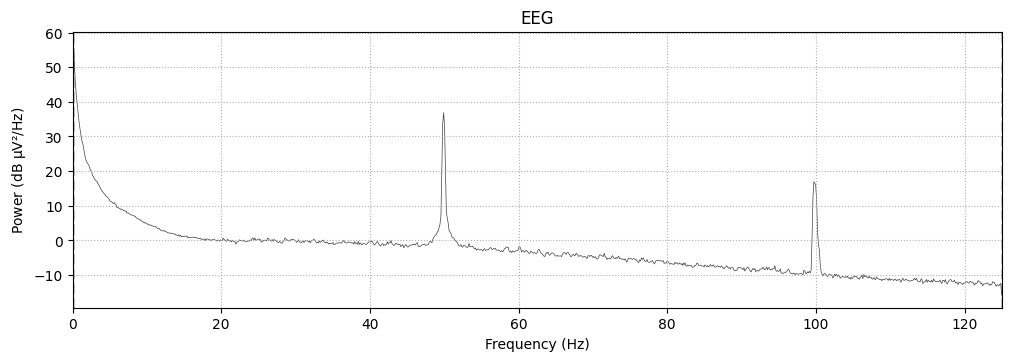

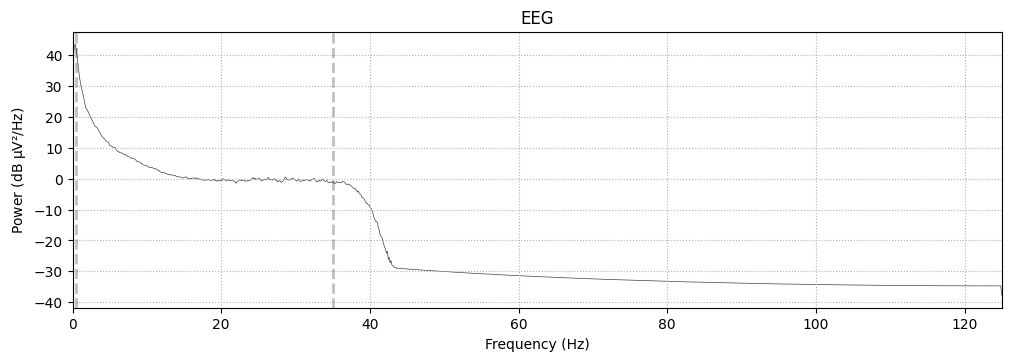

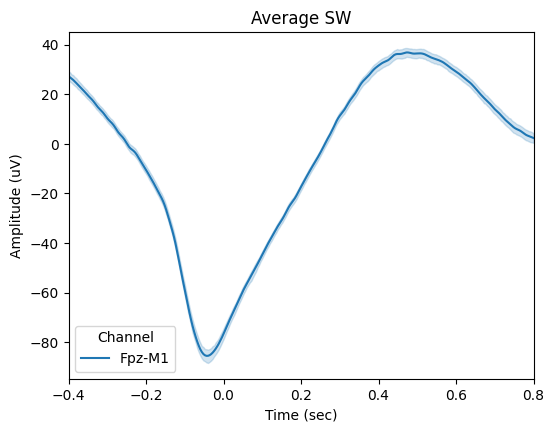

In [31]:
import pandas as pd
import run_feature_pipeline
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

errors = []
dataframes = []

# Could get these working later
skip_list = ['2024-07-23-22-40-25', '2024-07-28-22-29-49', '2024-09-18-21-25-08', '2024-09-18-21-28-11']
import io
import sys
import contextlib
import traceback
from importlib import reload

import convert
reload(convert)

reload(run_feature_pipeline)

import run_yasa
reload(run_yasa)

def process_file(root, dir_name, force=False):
    output_buffer = io.StringIO()
    with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):

        try:
            input_file = os.path.join(root, dir_name, "raw.fif")
            if dir_name in skip_list:
                log(f"Skipping {dir_name}: {input_file}")
                return None, False, output_buffer.getvalue(), "Skipped"

            log(f"Processing file: {input_file}")
            if os.path.exists(input_file):
                yasa_df, cached = run_feature_pipeline.cached_pipeline(log, input_file, force or global_force)
                return yasa_df, cached, output_buffer.getvalue(), True
            else:
                log(f"File not found: {input_file}")
                return None, False, output_buffer.getvalue(), "File not found"

        except Exception as e:
            traceback.print_exc()
            msg = f"Error processing file: {input_file} - {e}"
            log(msg)
            errors.append(msg)
            return None, False, output_buffer.getvalue(), "Error: " + str(e)

# Testing
yasa_df, cached, stdout, success_or_msg = process_file("C:\\dev\\play\\brainwave-data", "2024-09-19-21-29-42", True)
stdout, success_or_msg

In [32]:
results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

from tqdm.auto import tqdm

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="YASA pipeline")):
    yasa_df, cached, stdout, success_or_msg = process_file(input_dir, dir_name)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

YASA pipeline:   0%|          | 0/163 [00:00<?, ?it/s]

,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,2025-03-24 09:07:58.379763 Processing file: C:...,File not found
1,09-07-2024--22-52-25,False,2025-03-24 09:07:58.383553 Processing file: C:...,File not found
2,2024-07-08-22-51-16,True,2025-03-24 09:07:58.386825 Processing file: C:...,True
3,2024-07-11-22-46-18,True,2025-03-24 09:07:58.405095 Processing file: C:...,True
4,2024-07-12-22-38-58,True,2025-03-24 09:07:58.432757 Processing file: C:...,True
...,...,...,...,...
158,2025-03-20-21-22-08,True,2025-03-24 09:08:00.131466 Processing file: C:...,True
159,2025-03-22-21-39-28,True,2025-03-24 09:08:00.147814 Processing file: C:...,True
160,2025-03-23-21-09-37,False,2025-03-24 09:08:00.147814 Processing file: C:...,True
161,compressed_files,False,2025-03-24 09:08:26.016171 Processing file: C:...,File not found


# Artifacts

In [33]:
import os
import io

from importlib import reload
import notebooks.EEGArtifacts.eeg_artifacts
reload(notebooks.EEGArtifacts.eeg_artifacts)


# Testing
artifacts_df, cached, stdout, success_or_msg = notebooks.EEGArtifacts.eeg_artifacts.process_artifacts("C:\\dev\\play\\brainwave-data", "2025-02-12-20-34-56", False)
stdout, success_or_msg

('Processing file: C:\\dev\\play\\brainwave-data\\2025-02-12-20-34-56\\raw.fif\n',
 True)

In [34]:
from importlib import reload
import notebooks.EEGArtifacts.eeg_artifacts
reload(notebooks.EEGArtifacts.eeg_artifacts)

results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Artifacts pipeline")):
# for idx, dir_name in enumerate(dirs):
    # print(dir_name)
    artifacts_df, cached, stdout, success_or_msg = notebooks.EEGArtifacts.eeg_artifacts.process_artifacts(input_dir, dir_name, global_force)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

Artifacts pipeline:   0%|          | 0/163 [00:00<?, ?it/s]

,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,Processing file: C:\dev\play\brainwave-data\08...,File not found C:\dev\play\brainwave-data\08-0...
1,09-07-2024--22-52-25,False,Processing file: C:\dev\play\brainwave-data\09...,File not found C:\dev\play\brainwave-data\09-0...
2,2024-07-08-22-51-16,True,Processing file: C:\dev\play\brainwave-data\20...,True
3,2024-07-11-22-46-18,True,Processing file: C:\dev\play\brainwave-data\20...,True
4,2024-07-12-22-38-58,True,Processing file: C:\dev\play\brainwave-data\20...,True
...,...,...,...,...
158,2025-03-20-21-22-08,True,Processing file: C:\dev\play\brainwave-data\20...,True
159,2025-03-22-21-39-28,True,Processing file: C:\dev\play\brainwave-data\20...,True
160,2025-03-23-21-09-37,False,Processing file: C:\dev\play\brainwave-data\20...,True
161,compressed_files,False,Processing file: C:\dev\play\brainwave-data\co...,File not found C:\dev\play\brainwave-data\comp...


# Physiological pipeline

In [35]:
import traceback
import os

from importlib import reload
import run_physical_features_pipeline
reload(run_physical_features_pipeline)
import io
import contextlib
from datetime import datetime, timedelta


def process_file_for_physical(root, dir_name, force=False):
    output_buffer = io.StringIO()
    with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):
        input_fif_file = os.path.join(root, dir_name, "raw.fif")
        input_csv_file = os.path.join(root, dir_name, "raw.yasa.csv")
    #     try:
        if os.path.exists(input_csv_file):
            yasa_df = pd.read_csv(input_csv_file)
            physical_features_df_30s, physical_features_df_1s, cached = run_physical_features_pipeline.cached_physical_features_pipeline(log, input_fif_file, yasa_df, force or global_force)
            return physical_features_df_30s, physical_features_df_1s, cached, output_buffer.getvalue(), True
        else:
            log(f"File not found: {input_fif_file} or {input_csv_file}")
            return None, None, False, output_buffer.getvalue(), "File not found"
        # except Exception as e:
        #     return None, False, output_buffer.getvalue(), (str(e) + " " + traceback.format_exc())

# Testing
# physical_features_df_30s, physical_features_df_1s, cached, stdout, success_or_msg = process_file_for_physical("C:\\dev\\play\\brainwave-data", "2025-03-20-21-22-08", True)
# # display(stdout)
# display(success_or_msg)
# # display(physical_features_df_30s)

In [36]:
from tqdm.auto import tqdm

results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Physiological pipeline")):
    _, _, cached, stdout, success_or_msg = process_file_for_physical(input_dir, dir_name)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

Physiological pipeline:   0%|          | 0/163 [00:00<?, ?it/s]

,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,2025-03-24 09:08:45.520986 File not found: C:\...,File not found
1,09-07-2024--22-52-25,False,2025-03-24 09:08:45.523982 File not found: C:\...,File not found
2,2024-07-08-22-51-16,True,2025-03-24 09:08:45.537300 Loading cached 30s ...,True
3,2024-07-11-22-46-18,True,2025-03-24 09:08:45.568335 Loading cached 30s ...,True
4,2024-07-12-22-38-58,True,2025-03-24 09:08:45.600552 Loading cached 30s ...,True
...,...,...,...,...
158,2025-03-20-21-22-08,True,2025-03-24 09:08:52.258003 Loading cached 30s ...,True
159,2025-03-22-21-39-28,True,2025-03-24 09:08:52.315225 Loading cached 30s ...,True
160,2025-03-23-21-09-37,False,2025-03-24 09:08:52.370006 Generating 30s data...,True
161,compressed_files,False,2025-03-24 09:08:56.187838 File not found: C:\...,File not found


# Post-YASA pipeline

In [37]:
import traceback
import os

from importlib import reload
import run_post_yasa_pipeline
reload(run_post_yasa_pipeline)
import yasa_features
reload(yasa_features)


def process_file_for_post_yasa(root, dir_name, force=False):
    output_buffer = io.StringIO()
    # with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):

    input_fif_file = os.path.join(root, dir_name, "raw.fif")
    input_csv_file = os.path.join(root, dir_name, "raw.yasa.csv")
    artifacts_csv_path = os.path.join(root, dir_name, "raw.artifacts.csv")

    try:
        log(f"Processing file: " + input_fif_file)
        if os.path.exists(input_fif_file) and os.path.exists(input_csv_file) and os.path.exists(artifacts_csv_path):
            yasa_df = pd.read_csv(input_csv_file)
            artifacts_df = pd.read_csv(artifacts_csv_path)
            post_yasa_df, cached = run_post_yasa_pipeline.cached_post_yasa_pipeline(log, input_fif_file, yasa_df, stats_df, artifacts_df, force or global_force)
            return post_yasa_df, cached, output_buffer.getvalue(), True
        else:
            log(f"File not found: {input_fif_file} or {input_csv_file}")
            return None, False, output_buffer.getvalue(), "File not found"
    except Exception as e:
        traceback.print_exc()
        return None, False, output_buffer.getvalue(), e

# Testing
post_yasa_df, cached, stdout, success_or_msg = process_file_for_post_yasa("C:\\dev\\play\\brainwave-data", "2024-09-19-21-29-42", True)
display(stdout)
display(success_or_msg)

2025-03-24 09:08:56.258017 Processing file: C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.artifacts.csv
2025-03-24 09:08:56.260695 Loading cached file C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.post_yasa.csv
2025-03-24 09:08:56.361170 Forced rebuild
2025-03-24 09:08:56.361170 Loading MNE file C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.fif
2025-03-24 09:08:56.361170 Reading file C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.fif
2025-03-24 09:08:57.237828 Finished reading file C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.fif
2025-03-24 09:08:59.024583 Memory Usage: 984.33 MB GC to 984.33 MB
2025-03-24 09:08:59.024583 Extracting YASA features
    Using multitaper spectrum estimation with 7 DPSS windows


c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)


    Using multitaper spectrum estimation with 7 DPSS windows


c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterat

2025-03-24 09:09:51.463711 All done! C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.fif
2025-03-24 09:09:51.479741 Saving to: C:\dev\play\brainwave-data\2024-09-19-21-29-42\raw.post_yasa.csv


''

True

In [38]:
results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

all_post_yasa_dfs = []

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Post YASA pipeline")):
    post_yasa_df, cached, stdout, success_or_msg = process_file_for_post_yasa(input_dir, dir_name)
    all_post_yasa_dfs.append(post_yasa_df)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]
    # error_count = len(results[results['success_or_msg'] != True])
    # if (error_count > 5):
    #     log(f"Stopping due to {error_count} errors")
    #     break

results


Post YASA pipeline:   0%|          | 0/163 [00:00<?, ?it/s]

2025-03-24 09:09:52.181632 Processing file: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif
2025-03-24 09:09:52.181632 File not found: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif or C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.yasa.csv
2025-03-24 09:09:52.184950 Processing file: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif
2025-03-24 09:09:52.185792 File not found: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif or C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.yasa.csv
2025-03-24 09:09:52.189810 Processing file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.artifacts.csv
2025-03-24 09:09:52.195724 Loading cached file C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.post_yasa.csv
2025-03-24 09:09:52.465937 Processing file: C:\dev\play\brainwave-data\2024-07-11-22-46-18\raw.fif
YASA file: C

Traceback (most recent call last):
  File "C:\Users\graha\AppData\Local\Temp\ipykernel_63444\162561415.py", line 23, in process_file_for_post_yasa
    artifacts_df = pd.read_csv(artifacts_csv_path)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\readers.py", line 1898, in _make_engine
    return mapping[engine](f, **self.options)
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\io\parsers\c_parser_wrapper.py", line 93, in __init__
    self._reader = par

2025-03-24 09:10:21.283509 Processing file: C:\dev\play\brainwave-data\2024-12-16-21-26-57\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-12-16-21-26-57\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-12-16-21-26-57\raw.artifacts.csv
2025-03-24 09:10:21.296934 Loading cached file C:\dev\play\brainwave-data\2024-12-16-21-26-57\raw.post_yasa.csv
2025-03-24 09:10:21.471819 Processing file: C:\dev\play\brainwave-data\2024-12-17-21-24-11\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-12-17-21-24-11\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-12-17-21-24-11\raw.artifacts.csv
2025-03-24 09:10:21.479560 Loading cached file C:\dev\play\brainwave-data\2024-12-17-21-24-11\raw.post_yasa.csv
2025-03-24 09:10:21.660272 Processing file: C:\dev\play\brainwave-data\2024-12-18-21-32-18\raw.fif
YASA file: C:\dev\play\brainwave-data\2024-12-18-21-32-18\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2024-12-18-21-32-18\raw.artifacts.csv
2025-03-24 09:10:21.678

c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
Traceback (most recent call last):
  File "c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\pandas\core\indexes\base.py", line 3

2025-03-24 09:10:53.867858 Processing file: C:\dev\play\brainwave-data\2025-03-08-21-45-12\raw.fif
YASA file: C:\dev\play\brainwave-data\2025-03-08-21-45-12\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2025-03-08-21-45-12\raw.artifacts.csv
2025-03-24 09:10:53.874503 Loading cached file C:\dev\play\brainwave-data\2025-03-08-21-45-12\raw.post_yasa.csv
2025-03-24 09:10:54.037718 Processing file: C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.fif
YASA file: C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.artifacts.csv
2025-03-24 09:10:54.048582 Loading cached file C:\dev\play\brainwave-data\2025-03-12-21-43-35\raw.post_yasa.csv
2025-03-24 09:10:54.540319 Processing file: C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.fif
YASA file: C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.yasa.csv
Artifacts file: C:\dev\play\brainwave-data\2025-03-18-21-40-28\raw.artifacts.csv
2025-03-24 09:10:54.564

c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:223: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(epochs, sf, 

    Using multitaper spectrum estimation with 7 DPSS windows


c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  res = func(*args, **kwargs)
c:\Users\graha\.conda\envs\3.10-tf\lib\site-packages\joblib\parallel.py:1847: RuntimeWarning: Iterat

2025-03-24 09:11:58.660342 All done! C:\dev\play\brainwave-data\2025-03-23-21-09-37\raw.fif
2025-03-24 09:11:58.704607 Saving to: C:\dev\play\brainwave-data\2025-03-23-21-09-37\raw.post_yasa.csv
2025-03-24 09:11:59.272164 Processing file: C:\dev\play\brainwave-data\compressed_files\raw.fif
2025-03-24 09:11:59.273151 File not found: C:\dev\play\brainwave-data\compressed_files\raw.fif or C:\dev\play\brainwave-data\compressed_files\raw.yasa.csv
2025-03-24 09:11:59.274455 Processing file: C:\dev\play\brainwave-data\nonnight\raw.fif
2025-03-24 09:11:59.274455 File not found: C:\dev\play\brainwave-data\nonnight\raw.fif or C:\dev\play\brainwave-data\nonnight\raw.yasa.csv


,dir_name,cached,stdout,success_or_msg
0,08-07-2024--22-51-16,False,,File not found
1,09-07-2024--22-52-25,False,,File not found
2,2024-07-08-22-51-16,True,,True
3,2024-07-11-22-46-18,True,,True
4,2024-07-12-22-38-58,True,,True
...,...,...,...,...
158,2025-03-20-21-22-08,True,,True
159,2025-03-22-21-39-28,True,,True
160,2025-03-23-21-09-37,False,,True
161,compressed_files,False,,File not found


# Recalculate scalings
N.b. can be run frequently but will only be picked up by new runs.  Maybe worth occasionally regenerating all old files.
And yes, for new features have to rerun the pipeline on everything, then generate the stats here, then rerun the pipeline again on everything to have them use those.

In [39]:
# post_yasa_dfs_combined = pd.concat(all_post_yasa_dfs)

In [40]:
# from scaling import only_eeg

# only_eeg_cols = list(only_eeg(post_yasa_dfs_combined).columns)
# assert any(col.startswith("Main") for col in only_eeg_cols), "No column starting with 'Main' found in only_eeg_cols"

In [41]:
# #Expensive to do every time now
# import scaling
# reload(scaling)

# stats = scaling.stats(post_yasa_dfs_combined)
# stats.to_csv(input_dir + "/stats.csv")
# # assert any(stats['Column'].str.startswith("Main")), "No row starting with 'Main' found in column_name"
# stats

# Microwakings

In [42]:
from models.microwakings_1 import microwakings_pipeline, microwakings1
import os

import io

from importlib import reload
reload(microwakings_pipeline)
reload(microwakings1)

def process_microwakings(root, dir_name, force=False):
    output_buffer = io.StringIO()
    # with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):
    input_fif_file = os.path.join(root, dir_name, "raw.fif")
    input_csv_file = os.path.join(root, dir_name, "raw.post_yasa.csv")
    try:
        print(f"Processing file: " + input_fif_file, flush=True)
        log(f"Processing file: " + input_fif_file)
        tqdm.write(f"Processing file: " + input_fif_file)
        if not os.path.exists(input_fif_file):
            return None, False, output_buffer.getvalue(), "File not found " + input_fif_file
        if not os.path.exists(input_csv_file):
            return None, False, output_buffer.getvalue(), "File not found " + input_csv_file

        post_yasa_df = pd.read_csv(input_csv_file)
        microwakings_df, cached = microwakings_pipeline.cached_microwakings_pipeline(log, input_fif_file, post_yasa_df, force or global_force)
        return microwakings_df, cached, output_buffer.getvalue(), True
    except Exception as e:
        return None, False, output_buffer.getvalue(), "Error: " + str(e)

# Testing
microwakings_df, cached, stdout, success_or_msg = process_microwakings("C:\\dev\\play\\brainwave-data", "2025-03-20-21-22-08", False)
stdout, success_or_msg

Processing file: C:\dev\play\brainwave-data\2025-03-20-21-22-08\raw.fif
2025-03-24 09:12:00.327688 Processing file: C:\dev\play\brainwave-data\2025-03-20-21-22-08\raw.fif
Processing file: C:\dev\play\brainwave-data\2025-03-20-21-22-08\raw.fif
2025-03-24 09:12:00.567530 Loading cached file C:\dev\play\brainwave-data\2025-03-20-21-22-08\raw.microwakings.csv


('', True)

: 

In [3]:
results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
# for idx, dir_name in enumerate(tqdm(dirs, desc="Microwakings pipeline")):
for idx, dir_name in enumerate(dirs):
    # print(dir_name)
    microwakings_df, cached, stdout, success_or_msg = process_microwakings(input_dir, dir_name, global_force)
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

Processing file: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif
2025-03-24 09:12:00.711021 Processing file: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif
Processing file: C:\dev\play\brainwave-data\08-07-2024--22-51-16\raw.fif
Processing file: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif
2025-03-24 09:12:00.717025 Processing file: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif
Processing file: C:\dev\play\brainwave-data\09-07-2024--22-52-25\raw.fif
Processing file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.fif
2025-03-24 09:12:00.722682 Processing file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.fif
Processing file: C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.fif
2025-03-24 09:12:00.976786 Loading cached file C:\dev\play\brainwave-data\2024-07-08-22-51-16\raw.microwakings.csv
Processing file: C:\dev\play\brainwave-data\2024-07-11-22-46-18\raw.fif
2025-03-24 09:12:00.982815 Processing file: C:\dev\play\brainwave-data\2024-07

# Post-human pipeline
This requires user interaction first to provide sleep times etc.

In [199]:
import sleep_events
from importlib import reload

reload(sleep_events)

from sleep_events import load_days_data
from sleep_events import pimp_my_days_data

days_data = load_days_data(True)

In [ ]:
from models.eeg_states.eeg_states import load_and_prepare_settling_eeg_state_events

tired_wired_eeg_state_events = load_and_prepare_settling_eeg_state_events()

In [ ]:
import models.eeg_states.eeg_states
reload(models.eeg_states.eeg_states)
import run_post_human_pipeline
reload(run_post_human_pipeline)
from run_post_human_pipeline import cached_post_human_pipeline


def process_file_for_post_human(root, dir_name, force=False):
    output_buffer = io.StringIO()
    with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):

        input_fif_file = os.path.join(root, dir_name, "raw.fif")
        input_csv_file = os.path.join(root, dir_name, "raw.post_yasa.csv")
        try:
            log(f"Processing file: " + input_fif_file)
            if not os.path.exists(input_fif_file):
                return None, False, output_buffer.getvalue(), "File not found " + input_fif_file
            if not os.path.exists(input_csv_file):
                return None, False, output_buffer.getvalue(), "File not found " + input_csv_file
            post_yasa_df = pd.read_csv(input_csv_file)
            post_human_df, cached = cached_post_human_pipeline(log, dir_name, input_fif_file, stats_df, days_data, post_yasa_df, tired_wired_eeg_state_events, force or global_force)
            return post_human_df, cached, output_buffer.getvalue(), True
        except Exception as e:
            traceback.print_exc()
            return None, False, output_buffer.getvalue(), "Error: " + str(e)

# Testing
post_human_df, cached, stdout, success_or_msg = process_file_for_post_human("C:\\dev\\play\\brainwave-data", "2024-09-19-21-29-42", False)
stdout, success_or_msg

In [ ]:
from run_post_human_pipeline import cached_post_human_pipeline

results = pd.DataFrame(columns=['dir_name', 'cached', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Post human pipeline")):
    post_human_df, cached, stdout, success_or_msg = process_file_for_post_human(input_dir, dir_name, global_force   )
    results.loc[len(results)] = [dir_name, cached, stdout, success_or_msg]

results

# Stitch all pipelines together

In [ ]:
from stitch_pipeline_results import stitch_day_optimised
import io
import contextlib
import os

def process_pipeline_stitch(root, dir_name, force=False):
    output_buffer = io.StringIO()
    with contextlib.redirect_stdout(output_buffer), contextlib.redirect_stderr(output_buffer):

        post_yasa_file = os.path.join(root, dir_name, "raw.post_yasa.csv")

        try:
            if os.path.exists(post_yasa_file):
                # Multiple consumers expect this file
                with_features = os.path.join(root, dir_name, "raw.with_features.csv")
                post_yasa_modification_time = os.path.getmtime(post_yasa_file)
                post_yasa_modification_date = datetime.fromtimestamp(post_yasa_modification_time)

                needs_creating = force

                if os.path.exists(with_features):
                    with_features_modification_time = os.path.getmtime(with_features)
                    with_features_modification_date = datetime.fromtimestamp(with_features_modification_time)

                    if post_yasa_modification_date > with_features_modification_date:
                        needs_creating = True
                        
                else:
                    needs_creating = True

                
                if needs_creating:
                    stitched = stitch_day_optimised(input_dir, dir_name, force or global_force)
                    assert("Main_eeg_sigmaabs" in stitched.columns), "Main_eeg_sigmaabs not found in stitched columns"
                    stitched.to_csv(with_features, index=False)

            return output_buffer.getvalue(), True
        except Exception as e:
            return output_buffer.getvalue(), "Error: " + str(e)


# Testing
stdout, success_or_msg = process_pipeline_stitch("C:\\dev\\play\\brainwave-data", "2024-09-19-21-29-42", True)
stdout, success_or_msg


In [ ]:
from tqdm.auto import tqdm


results = pd.DataFrame(columns=['dir_name', 'stdout', 'success_or_msg'])

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs, desc="Stitching pipelines")):
    stdout, success_or_msg = process_pipeline_stitch(input_dir, dir_name, False)
    results.loc[len(results)] = [dir_name, stdout, success_or_msg]

results

# Analyse data completeness

In [205]:
# import os
# import pandas as pd
# from datetime import datetime
#
# dfs = []
# modification_times = []
#
# for root, dirs, files in os.walk(input_dir):
#     for idx, dir_name in enumerate(dirs):
#         input_file = os.path.join(root, dir_name, "raw.post_human.csv")
#         if os.path.exists(input_file):
#             df = pd.read_csv(input_file)
#             dfs.append(df)
#
#             # Get the last modification time of the file
#             mod_time = os.path.getmtime(input_file)
#             mod_time_dt = datetime.fromtimestamp(mod_time)
#             modification_times.append(mod_time_dt)
#
# # Concatenate all dataframes
# yasa_df = pd.concat(dfs, ignore_index=True)
#
# # Calculate the number of days from today for each modification time
# today = datetime.now()
# days_since_modification = [(today - mod_time).days for mod_time in modification_times]
#
# # Create a DataFrame with the modification times and days since modification
# modification_df = pd.DataFrame({
#     'file': [os.path.join(root, dir_name, "raw.post_human.csv") for root, dirs, files in os.walk(input_dir) for dir_name in dirs if os.path.exists(os.path.join(root, dir_name, "raw.post_human.csv"))],
#     'modification_time': modification_times,
#     'days_since_modification': days_since_modification
# })
#
# modification_df

# Upload to GCS

In [206]:
# Test
import upload
from importlib import reload
reload(upload)
from upload import upload_dir_to_gcs_skipping_existing, upload_dir_to_gcs

import os
os.environ["GOOGLE_CLOUD_PROJECT"] = "examined-life-dd234" 

# Test
#upload_dir_to_gcs(lambda x: tqdm.write(x), 'examined-life-derived-eeg', "C:\\dev\\play\\brainwave-data\\2025-03-01-21-46-54", "2025-03-01-21-46-54")


In [ ]:
from upload import upload_dir_to_gcs_skipping_existing
import os

errors = []
dataframes = []

from tqdm.auto import tqdm

dirs = next(os.walk(input_dir))[1]
for idx, dir_name in enumerate(tqdm(dirs)):
# for root, dirs, files in os.walk(input_dir):
#     for dir_name in reversed(dirs):
    input_file = os.path.join(input_dir, dir_name, "raw.fif")
    full_dir_name = os.path.join(input_dir, dir_name)
    try:
        upload_dir_to_gcs_skipping_existing(lambda x: tqdm.write(x), 'examined-life-derived-eeg', full_dir_name, dir_name)
    except Exception as e:
        log("Error processing file: " + input_dir)
        errors.append("Error processing file: " + input_file + " - " + str(e))
        log(e)

for error in errors:
    log(error)

log("All uploaded")

# Check if can delete Brainwave files that are safely backed up

In [208]:

import os

errors = []
can_delete = []
cannot_delete = []

for root, dirs, files in os.walk(input_dir):
    for idx, file_name in enumerate(files):
        full_input_filename = os.path.join(root, file_name)
        if full_input_filename.endswith(".brainflow.csv"):
            compressed_full_output_filename = get_brainflow_compressed_filename(full_input_filename)
                
            if os.path.exists(compressed_full_output_filename):
                can_delete.append({
                    'backed_up': compressed_full_output_filename,
                    'full_filename': full_input_filename
                })
            else:
                cannot_delete.append(full_input_filename)
    

In [ ]:
can_delete_df = pd.DataFrame(can_delete)
can_delete_df

In [ ]:
cannot_delete

In [ ]:
can_delete_df['full_filename']

# Check if can delete Cyton files that are safely backed up

In [212]:
import webserver
import bz2
import shutil
import os
import time


errors = []
can_delete = []
cannot_delete = []

for root, dirs, files in os.walk(input_dir):
    for idx, file_name in enumerate(files):
        full_input_filename = os.path.join(root, file_name)
        if file_name.startswith("OBCI_") and file_name.endswith(".TXT.bz2"):
            can_delete.append({
                'file_name': file_name.removesuffix(".bz2"),
                'full_filename': full_input_filename
            })

In [ ]:
can_delete

In [214]:
cyton_file_locations = [input_dir, "d:", "e:", "x:"]

for cyton_file_location in cyton_file_locations:
    for root, dirs, files in os.walk(cyton_file_location):
        for idx, file in enumerate(files):
            matching_record = next((f for f in can_delete if f['file_name'] == file), None)
            if matching_record:
                full_filename = os.path.join(root, file)
                log(f"Could delete {full_filename} as backed up in {matching_record['full_filename']}")

In [ ]:
import memory

memory.garbage_collect(log)

In [ ]:
import ctypes

ctypes.windll.user32.MessageBoxW(0, "Compression is complete!", "Alert", 0x40 | 0x1)